# **HW1: Mathematical Modeling Fundamentals**

In [20]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict

%config InlineBackend.figure_format = "retina"

## **Problem 1: Hot Topic Immigration**

It is commonly claimed in the United States that "immigrants [in the United States] depress
wages and take jobs away from native-born Americans." While a narrative can easily be attached to this assertion upon first glance, observing census data on immigration population in the United States will allow for actual information to tell a story and provide us with reason to throw this hypothesis out or not throw it out at all.

### **1.1: Load data from Census Bureau**

In [21]:
df_foreign_born: pd.DataFrame = pd.read_excel("data/immigration_census_data.xlsx")
df_foreign_born.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico


Ensure that state data can be added to the easily be merged, so extract the column of states and ensure that a column with just state names exists.

In [22]:
df_foreign_born["State"] = [
    re.sub(r'^\d+\. ', '', state).title()  # Regex generated by ChatGPT
    for state in df_foreign_born.loc[:,"Rank & State"]
]
df_foreign_born.loc[df_foreign_born["State"] == "District Of Columbia", "State"] = "District of Columbia"
df_foreign_born.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin,State
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico,California
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.,New York
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India,New Jersey
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba,Florida
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico,Nevada


### **1.2: Observe Median Wages in Each State**

Observing median wages in each state can help us in crafting a story of whether or not the hypothesis about immigrants depressing wages can be proven false. Median wage data from the U.S Bureau of Labor Statistics from 2022 can be found <a href="https://www.statsamerica.org/sip/rank_list.aspx?rank_label=ow_c&item_in=00-0000&ct=S09">here</a>. 

In [23]:
df_median_wages: pd.DataFrame = pd.read_excel("data/median_wages_by_state.xlsx") 
df_median_wages.rename(columns={"Rank": "wage_rank"})
df_median_wages.head()

,Rank,State,FIPS Code,Median Annual Wage
0,1,District of Columbia,11000,82930
1,2,Massachusetts,25000,58450
2,3,Washington,53000,56320
3,4,New York,36000,52470
4,5,Alaska,2000,52000


Inner-join this data onto the immigration data to have a more hollistic, complete dataset that can approach this hypothesis. 

In [24]:
df: pd.DataFrame = df_foreign_born.merge(df_median_wages, on="State", how="inner")
df.head()

,Rank & State,Foreign-Born Population (percent),Foreign-Born Population (total),Native Population,Foreign-Born Population w/ Citizenship,Most Common Country of Origin,State,Rank,FIPS Code,Median Annual Wage
0,1. CALIFORNIA,0.270,10437630,28216576,0.492,Mexico,California,10,6000,49740
1,2. NEW YORK,0.226,4442247,15255210,0.545,Dominican Rep.,New York,4,36000,52470
2,3. NEW JERSEY,0.218,1943338,6972118,0.539,India,New Jersey,8,34000,51080
3,4. FLORIDA,0.199,3967671,15966780,0.538,Cuba,Florida,38,12000,40820
4,5. NEVADA,0.193,547696,2291476,0.467,Mexico,Nevada,39,32000,40810


### **1.3: Plot a Graph of Immigrant % (x) vs. Median Wage (y)**

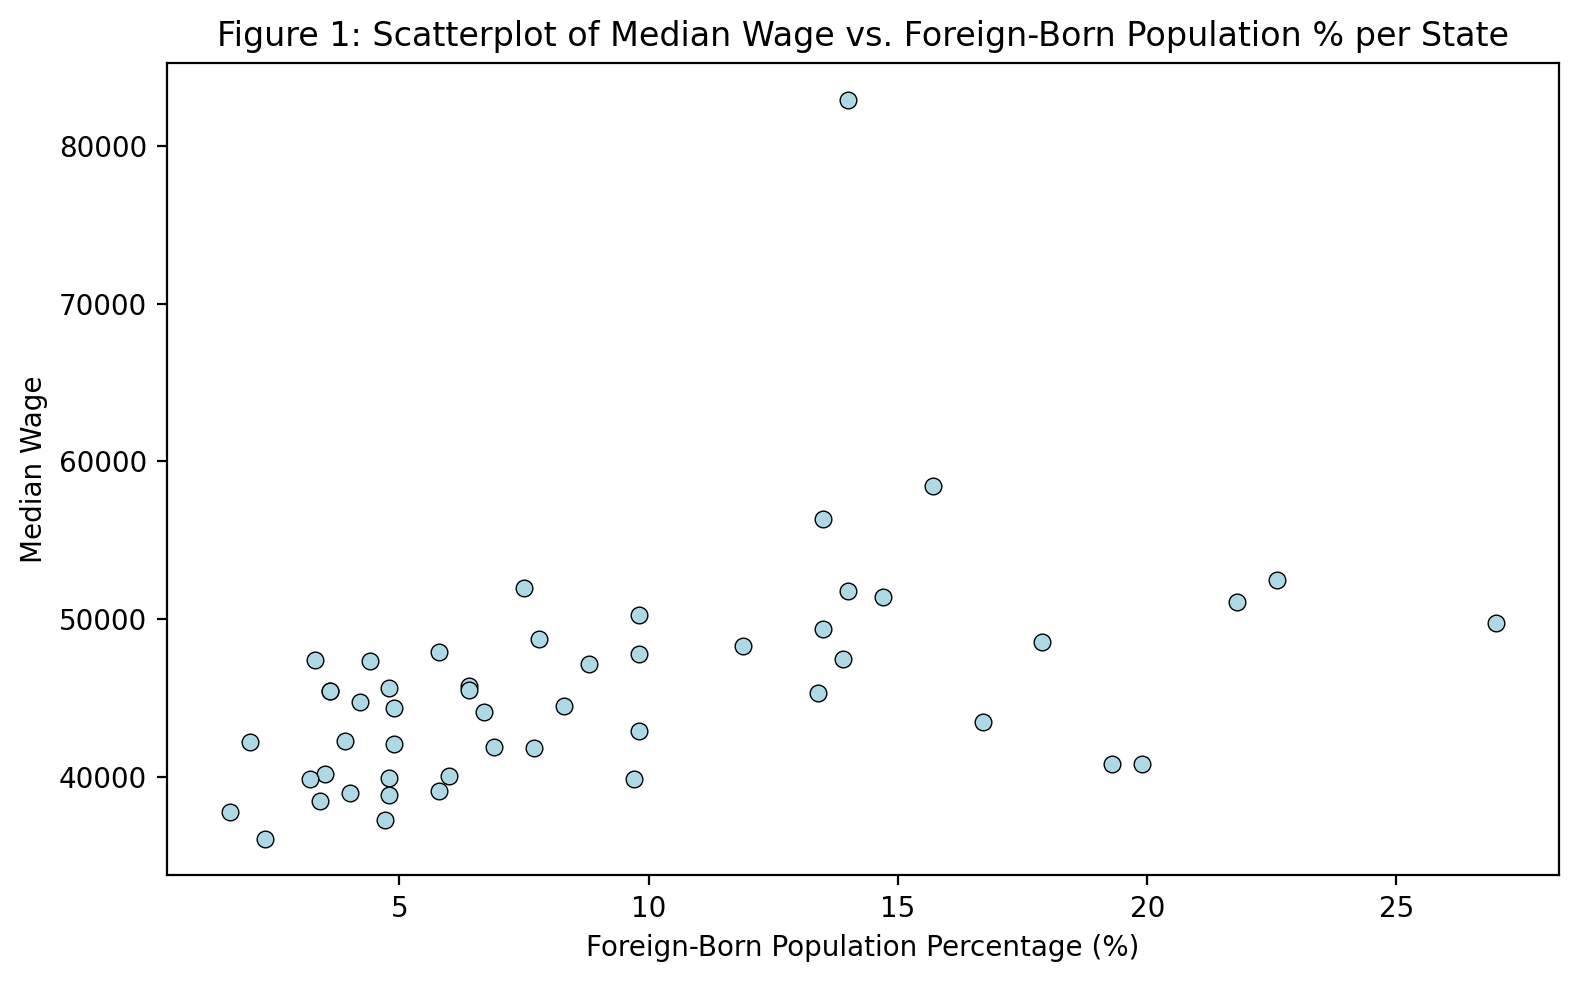

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["Foreign-Born Population (percent)"]*100, 
    df["Median Annual Wage"], 
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Foreign-Born Population Percentage (%)")
ax.set_ylabel("Median Wage")
ax.set_title("Figure 1: Scatterplot of Median Wage vs. Foreign-Born Population % per State")
fig.tight_layout()
fig.savefig("plots/figure1.png")
plt.show()

Check the distribution of median wages to determine whether or not an extreme outlier like washington should be removed.

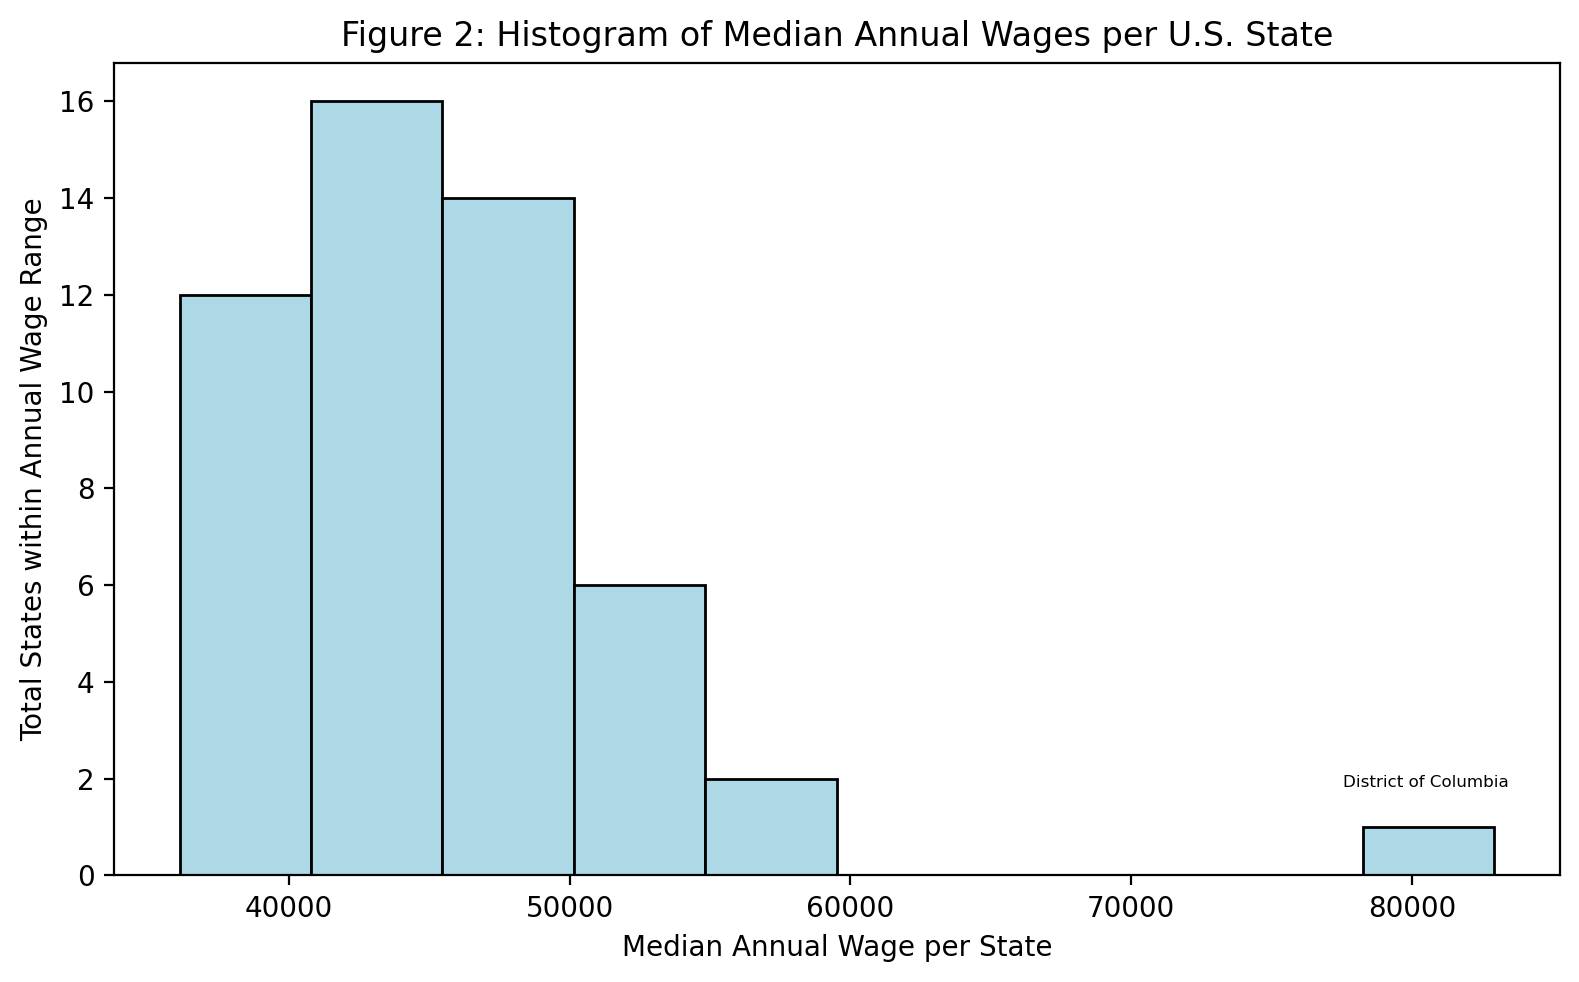

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
plt.hist(df["Median Annual Wage"], bins=10, color='lightblue', edgecolor='black')

plt.xlabel("Median Annual Wage per State")
plt.ylabel("Total States within Annual Wage Range")
plt.title("Figure 2: Histogram of Median Annual Wages per U.S. State")

dc_wage = df[df["State"] == "District of Columbia"]["Median Annual Wage"].values[0]
plt.annotate('District of Columbia', (80500, 1.25), textcoords="offset points", xytext=(0,10), ha='center', size=6)

fig.tight_layout()
fig.savefig("plots/figure2.png")
plt.show()

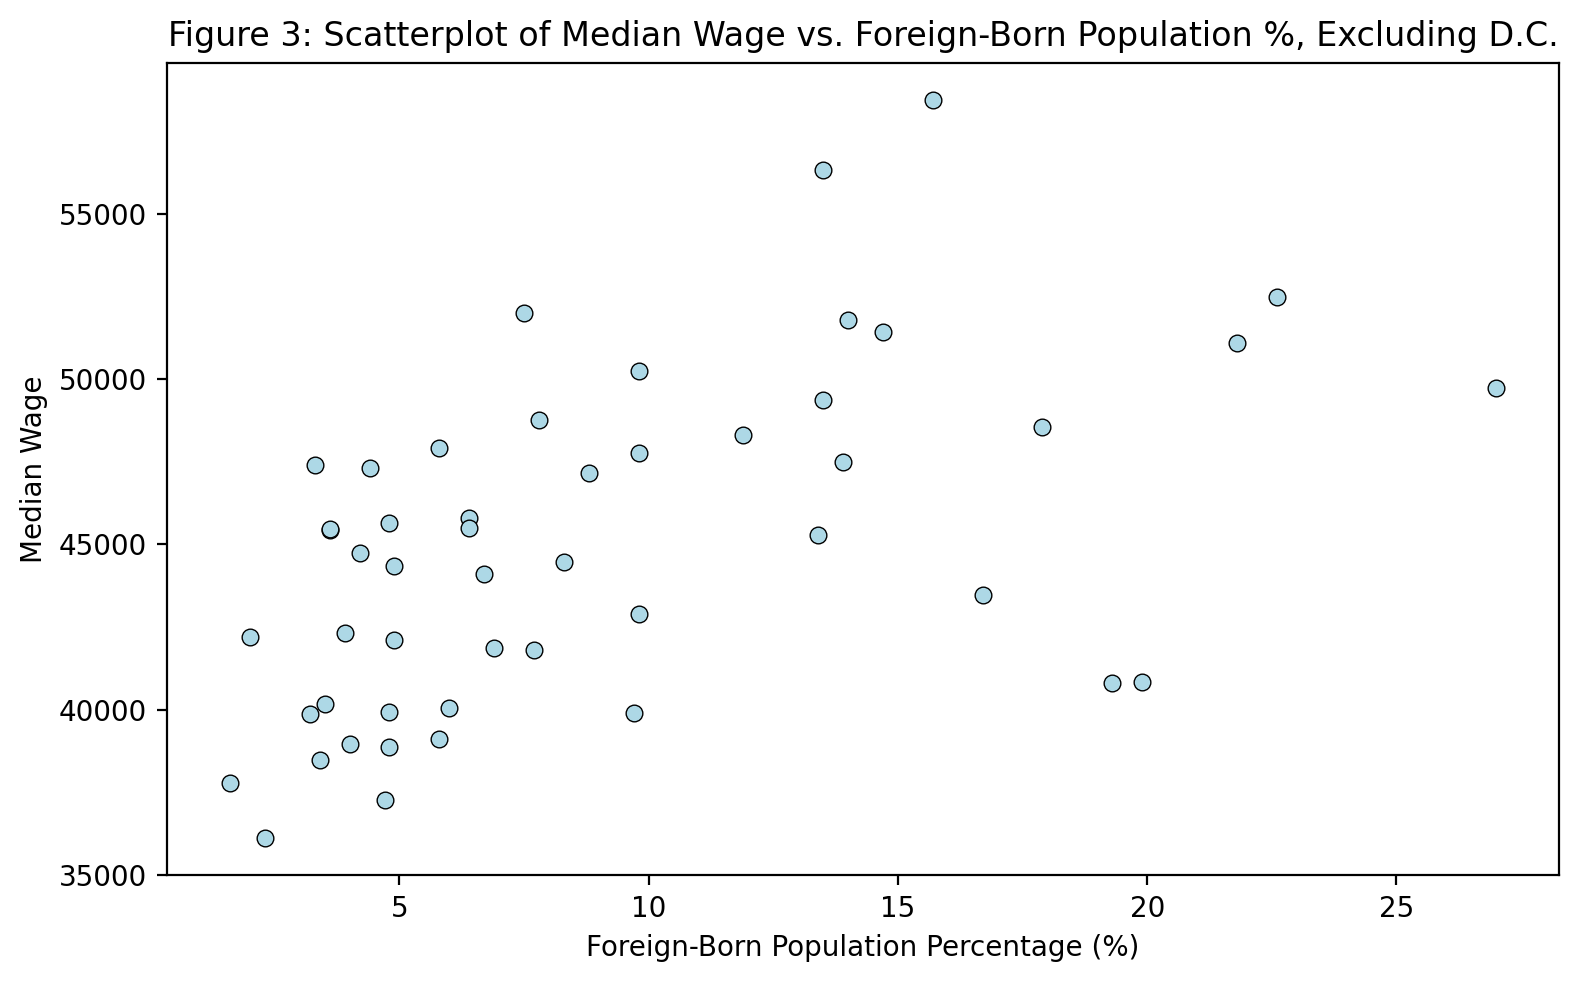

In [27]:
df_filtered = df[df["State"] != "District of Columbia"]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df_filtered["Foreign-Born Population (percent)"]*100, 
    df_filtered["Median Annual Wage"], 
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Foreign-Born Population Percentage (%)")
ax.set_ylabel("Median Wage")
ax.set_title("Figure 3: Scatterplot of Median Wage vs. Foreign-Born Population %, Excluding D.C.")

fig.tight_layout()
fig.savefig("plots/figure3.png")
plt.show()

In `Figure 3`, there seems to be a somewhat positive correlation between median wage in U.S. states and foreign-born population percentage within each state. However, this trend is likely not linear, since this increase appears to taper off as foreign-born population percentage increases beyond the 16% range.

## **Problem 2. Hot Topic: Tax Rates**

### **2.1: Load Tax Rate Data**

In [28]:
df_tax: pd.DataFrame = pd.read_excel("data/tax_rate_by_state.xlsx")
df_tax.head()

,State,Total Tax Burden,Property Tax Burden,Individual Income Tax Burden,Total Sales & Excise Tax Burden
0,New York,12.47,4.36,4.72,3.39
1,Hawaii,12.31,2.74,2.86,6.71
2,Maine,11.14,5.33,2.52,3.29
3,Vermont,10.28,4.98,2.07,3.23
4,Connecticut,9.83,4.24,2.92,2.67


### **2.2: Find Real Per GDP Data** 

In [29]:
df_gdp = pd.read_excel(
    "data/real_per_capita_gdp.xlsx", 
    sheet_name="Data", 
    header=None, 
    skiprows=5, 
    usecols="B:C", 
    names=["State", "Real Per Capita GDP"],
)
df_gdp.head()

,State,Real Per Capita GDP
0,District of Columbia,192419.80
1,New York,79434.45
2,Massachusetts,77896.55
3,Washington,74773.65
4,California,73934.82


In [30]:
df: pd.DataFrame = df_tax.merge(df_gdp, on="State", how="inner")
df.head()

,State,Total Tax Burden,Property Tax Burden,Individual Income Tax Burden,Total Sales & Excise Tax Burden,Real Per Capita GDP
0,New York,12.47,4.36,4.72,3.39,79434.45
1,Hawaii,12.31,2.74,2.86,6.71,52366.69
2,Maine,11.14,5.33,2.52,3.29,46750.62
3,Vermont,10.28,4.98,2.07,3.23,48519.62
4,Connecticut,9.83,4.24,2.92,2.67,69641.21


### **2.3: Plot a Graph of Total Tax Burden (x) vs. Real Per Capita GDP (y)**

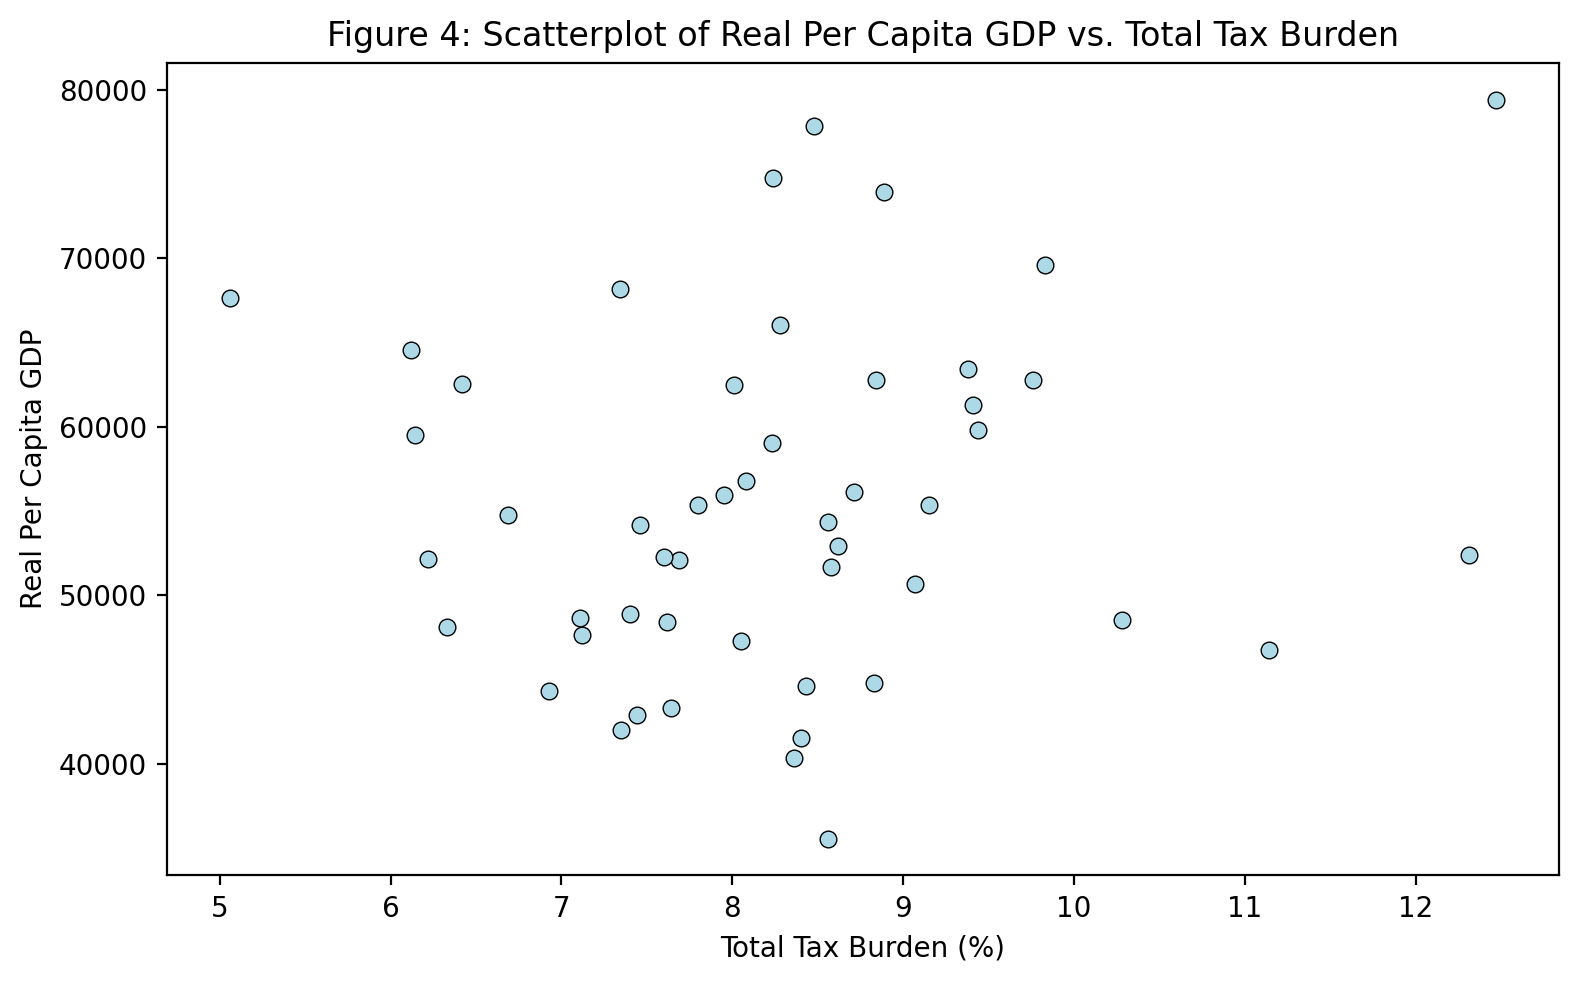

In [31]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["Total Tax Burden"], 
    df["Real Per Capita GDP"], 
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Total Tax Burden (%)")
ax.set_ylabel("Real Per Capita GDP")
ax.set_title("Figure 4: Scatterplot of Real Per Capita GDP vs. Total Tax Burden")
fig.tight_layout()
fig.savefig("plots/figure4.png")
plt.show()

## **Problem 3. Hot Topic: Gun Violence**

In [32]:
df_guns: pd.DataFrame = pd.read_excel("data/gun_ownership_rate_per_state.xlsx")
print(df_guns.shape[0])
df_guns.head()

51


,State,Gun Ownership Rate
0,Rhode Island,5.8
1,New York,10.3
2,New Jersey,11.3
3,New Hampshire,14.4
4,Connecticut,16.6


In [33]:
df_deaths: pd.DataFrame = pd.read_csv("data/deaths_by_guns_by_state.csv")
print(df_deaths.shape[0])
df_deaths.head()

50


,YEAR,State,Gun Death Rate,DEATHS,URL
0,2014,Alabama,16.9,815,/nchs/pressroom/states/alabama/alabama.htm
1,2014,Arkansas,19.2,145,/nchs/pressroom/states/alaska/alaska.htm
2,2014,Arizona,13.5,927,/nchs/pressroom/states/arizona/arizona.htm
3,2014,Arkansas,16.6,496,/nchs/pressroom/states/arkansas/arkansas.htm
4,2014,California,7.4,2942,/nchs/pressroom/states/california/california.htm


In [34]:
df: pd.DataFrame = df_guns.merge(df_deaths, on="State", how="inner")
df.head()

,State,Gun Ownership Rate,YEAR,Gun Death Rate,DEATHS,URL
0,Rhode Island,5.8,2014,3.0,34,/nchs/pressroom/states/rhodeisland/rhodeisland...
1,New York,10.3,2014,4.2,875,/nchs/pressroom/states/newyork/newyork.htm
2,New Jersey,11.3,2014,5.3,468,/nchs/pressroom/states/newjersey/newjersey.htm
3,New Hampshire,14.4,2014,8.7,122,/nchs/pressroom/states/newhampshire/newhampshi...
4,Connecticut,16.6,2014,5.0,187,/nchs/pressroom/states/connecticut/connecticut...


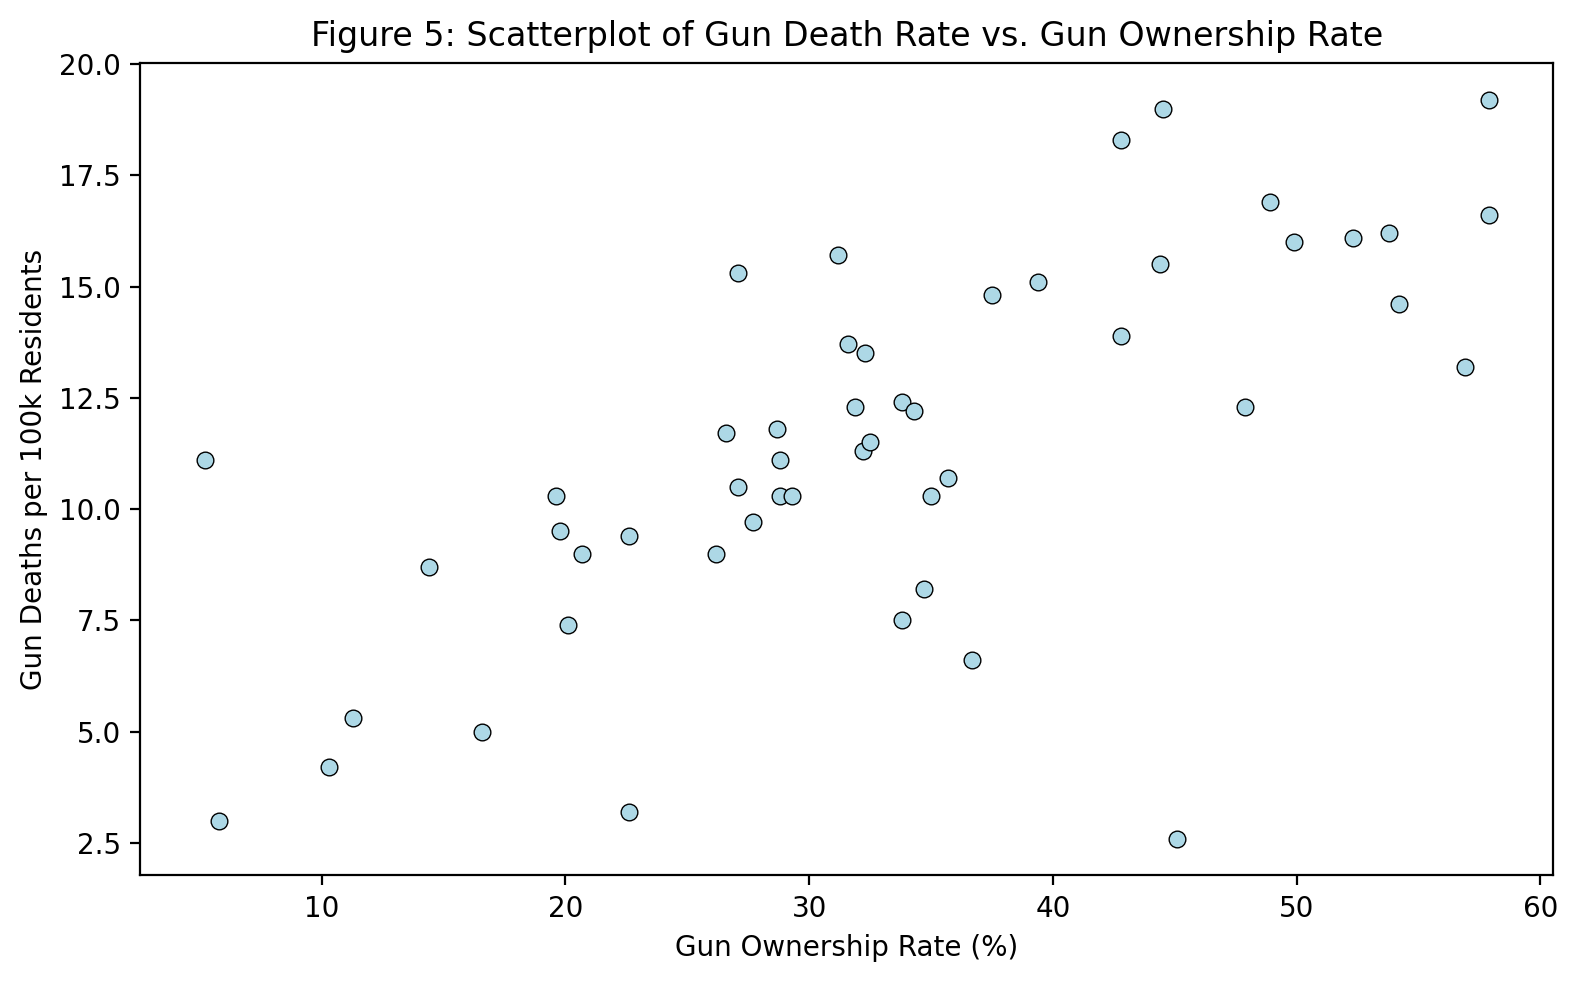

In [35]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["Gun Ownership Rate"], 
    df["Gun Death Rate"],
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Gun Ownership Rate (%)")
ax.set_ylabel("Gun Deaths per 100k Residents")
ax.set_title("Figure 5: Scatterplot of Gun Death Rate vs. Gun Ownership Rate")
fig.tight_layout()
fig.savefig("plots/figure5.png")
plt.show()

## **Problem 4. Equal Opportunity**

Let's observe the relationship between minimum wage and employment.

In [40]:
df_unemployment: pd.DataFrame = pd.read_excel("data/unemployment_rate_by_state.xlsx", skiprows=2)
df_unemployment.tail()

,State,Current Rate
46,Virginia,2.5
47,Washington,3.6
48,West Virginia,3.4
49,Wisconsin,2.6
50,Wyoming,3.0


In [41]:
df_minimum_wage: pd.DataFrame = pd.read_excel("data/minimum_wage_by_state.xlsx")
df_minimum_wage.head()

,State,2023 Minimum Hourly Wage,2022 Minimum Hourly Wage
0,Alabama,7.25,7.25
1,Alaska,10.85,10.34
2,Arizona,13.85,12.80
3,Arkansas,11.00,11.00
4,California,15.50,14.00


In [43]:
df: pd.DataFrame = df_minimum_wage.merge(df_unemployment, on="State", how="inner")
df.head()

,State,2023 Minimum Hourly Wage,2022 Minimum Hourly Wage,Current Rate
0,Alabama,7.25,7.25,2.1
1,Alaska,10.85,10.34,3.8
2,Arizona,13.85,12.80,3.6
3,Arkansas,11.00,11.00,2.6
4,California,15.50,14.00,4.6


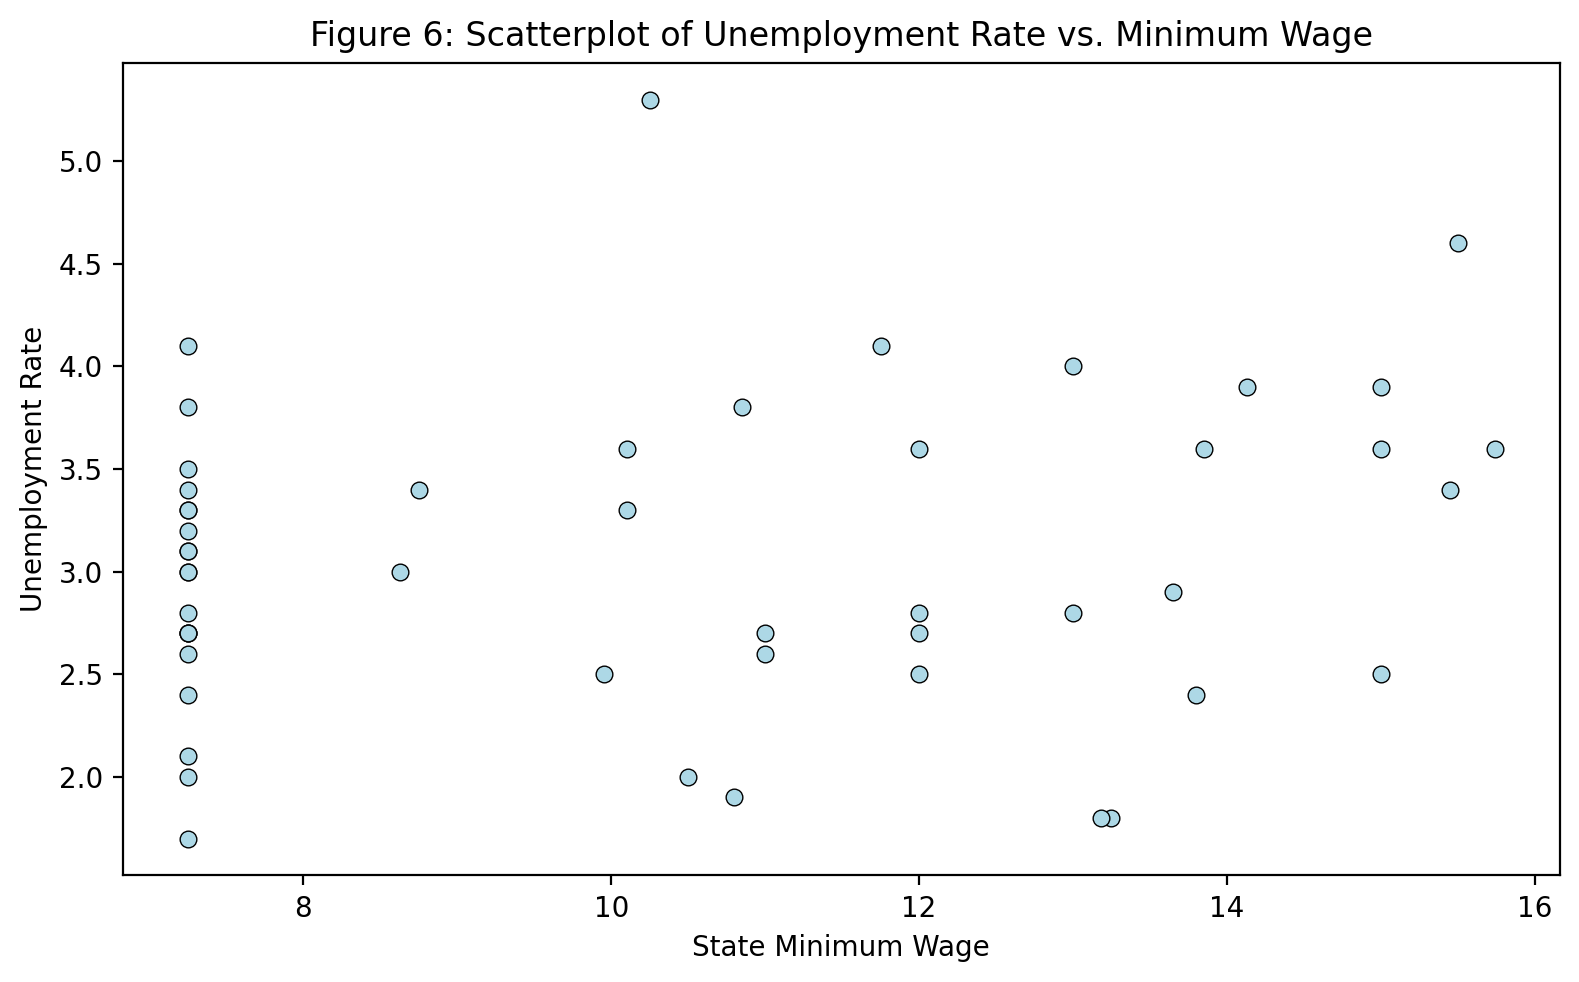

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["2023 Minimum Hourly Wage"], 
    df["Current Rate"],
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("State Minimum Wage")
ax.set_ylabel("Unemployment Rate")
ax.set_title("Figure 6: Scatterplot of Unemployment Rate vs. Minimum Wage")
fig.tight_layout()
fig.savefig("plots/figure6.png")
plt.show()

## **Problem  5: Personal Exploration**

I want to research the relationship between freedom in a country and the price of a Big Mac from McDonald's to evaluate how authoritarianism relates to purchasing power in a state.

In [47]:
df_fiw: pd.DataFrame = pd.read_excel(
    "data/fiw_calculations_by_country.xlsx",
    sheet_name="FIW13-23",
    skiprows=1,
)
print(df_fiw.shape[0])
df_fiw = df_fiw[df_fiw["Edition"] == 2023]
df_fiw.tail()

2305


,Country,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F3,F4,F,G1,G2,G3,G4,G,CL,Total
205,West Bank,Middle East,t,2023,NF,7,5,0,0,1,...,0,1,3,1,1,2,1,5,18,22
206,Western Sahara,Africa,t,2023,NF,7,7,0,0,0,...,0,0,0,1,1,2,0,4,7,4
207,Yemen,Middle East,c,2023,NF,7,6,0,0,0,...,0,0,1,0,1,1,0,2,8,9
208,Zambia,Africa,c,2023,PF,4,4,2,2,2,...,2,2,8,3,2,2,1,8,31,54
209,Zimbabwe,Africa,c,2023,NF,6,5,1,1,1,...,0,1,2,2,1,1,1,5,17,28


In [52]:
df_big_mac: pd.DataFrame = pd.read_excel(
    "data/big_mac_index_by_country.xlsx", 
    sheet_name="Data", 
    header=None, 
    skiprows=5, 
    usecols="B:C", 
    names=["Country", "Big Mac Index"],
)
df_big_mac.head(10)

,Country,Big Mac Index
0,Switzerland,7.73
1,Norway,6.92
2,Uruguay,6.86
3,Argentina,5.99
4,Euro area,5.82
5,Sweden,5.74
6,United States,5.58
7,Mexico,5.58
8,Sri Lanka,5.58
9,Denmark,5.41


The existance of "Euro area" in this dataset concerns me.

In [53]:
df: pd.DataFrame = df_fiw.merge(df_big_mac, on="Country", how="inner")
df.head()

,Country,Region,C/T,Edition,Status,PR rating,CL rating,A1,A2,A3,...,F4,F,G1,G2,G3,G4,G,CL,Total,Big Mac Index
0,Argentina,Americas,c,2023,F,2,2,4,4,3,...,3,10,4,3,4,3,14,50,85,5.99
1,Australia,Asia,c,2023,F,1,1,4,4,4,...,3,15,4,4,4,3,15,57,95,5.02
2,Azerbaijan,Eurasia,c,2023,NF,7,7,0,0,0,...,0,0,1,1,1,1,4,7,9,3.49
3,Bahrain,Middle East,c,2023,NF,7,6,0,1,1,...,0,1,1,2,2,1,6,10,12,4.51
4,Brazil,Americas,c,2023,F,2,3,3,3,4,...,2,8,4,3,3,2,12,42,72,4.81


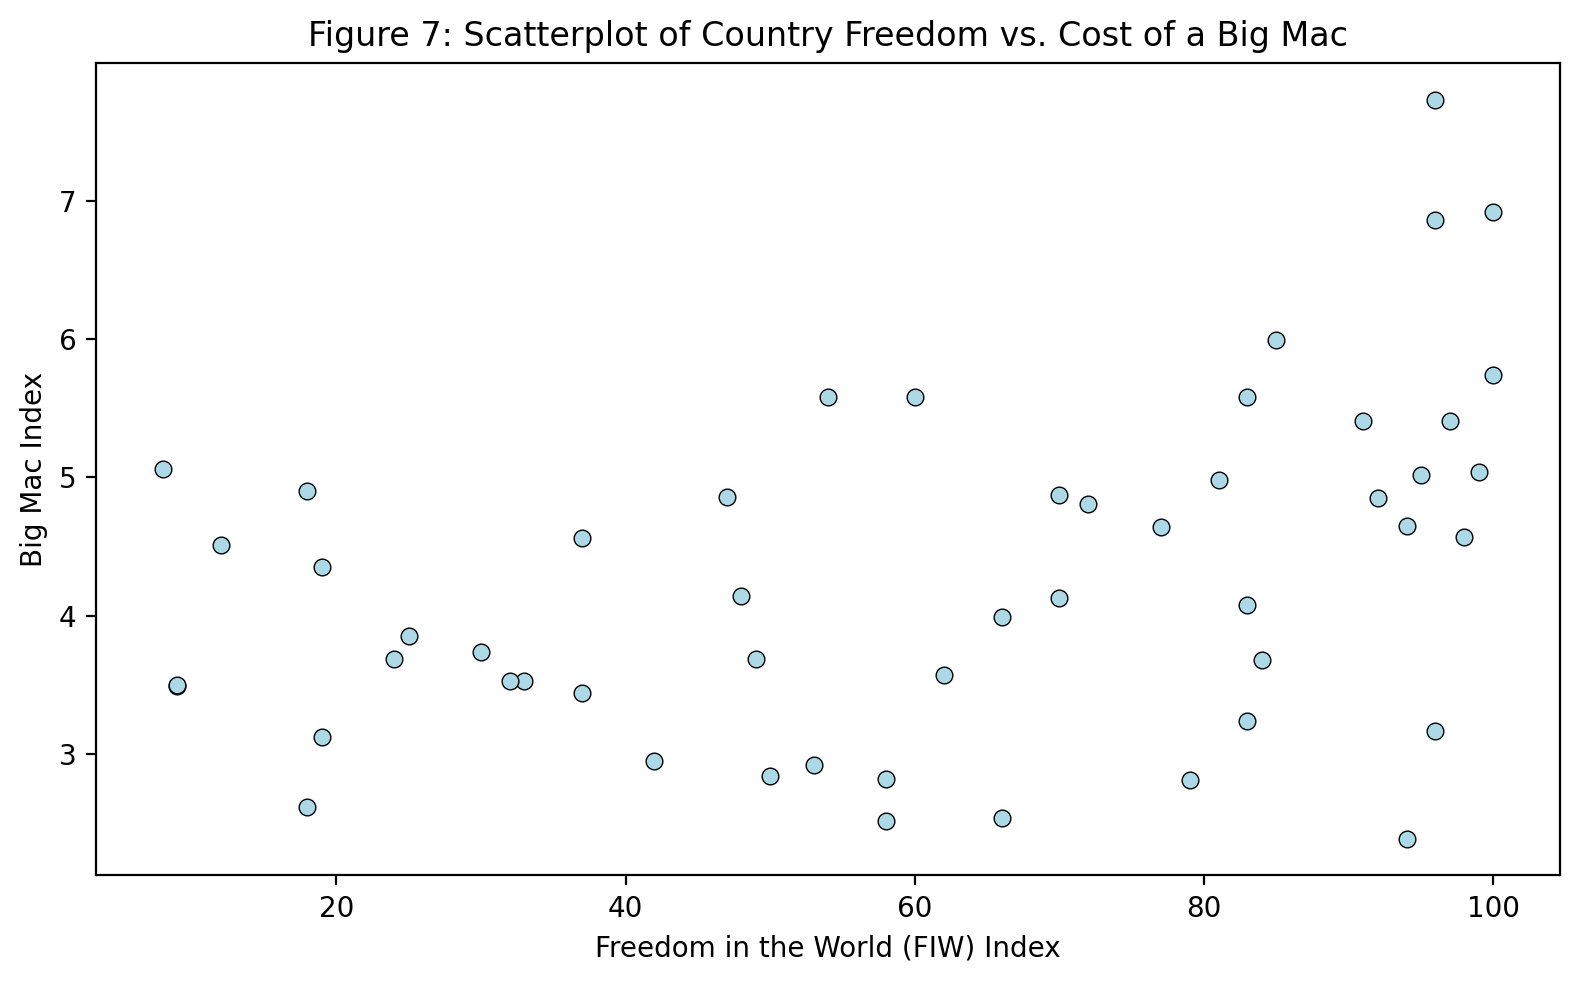

In [54]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(
    df["Total"], 
    df["Big Mac Index"],
    color="lightblue",
    edgecolors="black",
    linewidths=0.5,
)
ax.set_xlabel("Freedom in the World (FIW) Index")
ax.set_ylabel("Big Mac Index")
ax.set_title("Figure 7: Scatterplot of Country Freedom vs. Cost of a Big Mac")
fig.tight_layout()
fig.savefig("plots/figure7.png")
plt.show()